# SMOGN (0.1.0): Usage
---
## Example 2: Intermediate


## Installation

First, we install SMOGN from the Github repository. Alternatively, we could install from the official PyPI distribution. However, the developer version is utilized here for the latest release.

In [0]:
## suppress install output
%%capture

## install pypi release
# !pip install smogn

## install developer version
!pip install git+https://github.com/nickkunz/smogn.git

## Dependencies
Next, we load the required dependencies. Here we import `smogn` to later apply Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise. In addition, we use `pandas` for data handling, and `seaborn` to visualize our results.

In [0]:
## load dependencies
import smogn
import pandas
import seaborn

## Data
After, we load our data. In this example, we use the Ames Housing Dataset training split retreived from Kaggle, originally complied by Dean De Cock. In this case, we name our training set `housing`


In [0]:
## load data
housing = pandas.read_csv(

    ## http://jse.amstat.org/v19n3/decock.pdf
    'https://raw.githubusercontent.com/nickkunz/smogn/master/data/housing.csv'
)


## Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise
Here we cover the focus of this example. We call the `smoter` function from this package (`smogn.smoter`) and satisfy a typtical number of arguments:  `data`, `y`, `k`, `samp_method`, `rel_thres`, `rel_method`, `rel_xtrm_type`, `rel_coef`

* The `data` argument takes a Pandas DataFrame, which contains the training set split. In this example, we input the previously loaded `housing` training set with follow input: `data = housing`

* The `y` argument takes a string, which specifies a continuous reponse variable by header name. In this example, we input `'SalePrice'` in the interest of predicting the sale price of homes in Ames, Iowa with the following input: `y = 'SalePrice'` 

* The `k` argument takes a positive integer less than 𝑛, where 𝑛 is the sample size. `k` specifies the number of neighbors to consider for interpolation used in over-sampling. In this example, we input `9` to consider 4 additional neighbors (default is `5`) with the following input: `k = 9`

* The `samp_method` argument takes a string, either `'balance'` or `'extreme'`. If `'balance'` is specified, less over/under-sampling is conducted. If `'extreme'` is specified, more over/under-sampling is conducted. In this case, we input `'extreme'` (default is `'balance'`) to aggressively over/under-sample with the following input: `samp_method = 'extreme'`

* The `rel_thres` argument takes a real number between 0 and 1. It specifies the threshold of rarity. The higher the threshold, the higher the over/under-sampling boundary. The inverse is also true, where the lower the threshold, the lower the over/under-sampling boundary. In this example, we increase the boundary to `0.80` (default is `0.50`) with the following input: `rel_thres = 0.80`

* The `rel_method` argument takes a string, either `'auto'` or `'manual'`. It specifies how relevant or rare "minority" values in `y` are determined. If `'auto'` is specified, "minority" values are automatically determined by box plot extremes. If `'manual'` is specified, "minority" values are determined by the user. In this example, we input `'auto'` with the following input: `rel_method = 'auto'`

* The `rel_xtrm_type` argument takes a string, either `'low'` or `'both'` or `'high'`. It indicates which region of the response variable `y` should be considered rare or a "minority", when `rel_method = 'auto'`. In this example, we input `'high'` (default is `'both'`) in the interest of over-sampling high "minority" values in `y` with the following input: `rel_xtrm_type = 'high'`

* The `rel_coef` argument takes a positive real number. It specifies the box plot coefficient used to automatically determine extreme and therefore rare "minority" values in `y`, when `rel_method = 'auto'`. In this example, we input `2.25` (default is `1.50`) to increase the box plot extremes with the following input: `rel_coef = 2.25`



In [0]:
## conduct smogn
housing_smogn = smogn.smoter(
    
    ## main arguments
    data = housing,           ## pandas dataframe
    y = 'SalePrice',          ## string ('header name')
    k = 9,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.80,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 2.25           ## positive real number (0 < R)
)

**Note:**

In this example, the regions of interest within the response variable `y` are automatically determined by box plot extremes. The extreme values are considered rare "minorty" values are over-sampled. The values closer the median are considered "majority" values and are under-sampled.

If there are no box plot extremes contained in the reponse variable `y`, the argument `rel_method = manual` must be specified, and an input matrix must be placed into the argument `rel_ctrl_pts_rg` indicating the regions of rarity in `y`.

More information regarding the matrix input to the `rel_ctrl_pts_rg` argument and manual over-sampling can be found within the function's doc string, as well as in **Example 3: Advanced**.

It is also important to mention that by default, `smogn.smoter` will first automatically remove columns containing missing values and then remove rows, as it cannot input data containing missing values. This feature can be changed with the boolean arguments `drop_na_col = False` and `drop_na_rows = False`.

## Results
After conducting Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise, we briefly examine the results. 

We can see that the number of observations (rows) in the original training set increased from 1460 to 2643, while the number of features (columns) decreased from 81 to 62. 

Recall that `smogn.smoter` automatically removes features containing missing values. In this case, 19 features contained missing values and were therefore omitted.

The increase in observations were a result of over-sampling. More detailed information in this regard can be found in the original paper cited in the **References** section.




In [38]:
## dimensions - original data 
housing.shape

(1460, 81)

In [39]:
## dimensions - modified data
housing_smogn.shape

(2643, 62)

Further examining the results, we can see that the distribution of the response variable has changed. By calling the `box_plot_stats` function from this package (`smogn.box_plot_stats`) we quickly verify.

Notice that the modified training set's box plot five number summary has changed, where the distribution of the response variable has *skewed right* when compared to the original training set.

In [40]:
## box plot stats - original data 
smogn.box_plot_stats(housing['SalePrice'])['stats']

array([ 34900., 129950., 163000., 214000., 340000.])

In [41]:
## box plot stats - modified data
smogn.box_plot_stats(housing_smogn['SalePrice'])['stats']

array([ 34900., 163000., 336925., 391105., 628780.])

Plotting the results of both the original and modified training sets, the *skewed right* distribution of the response variable in the modified training set becomes more evident.

In this example, SMOGN over-sampled observations whose `'SalePrice'` was found to be extremely high according to the box plot (those considered "minority") and under-sampled observations that were closer to the median (those considered "majority").

This is perhaps most useful when most of the `y` values of interest in predicting are found at the extremes of the distribution within a given dataset.

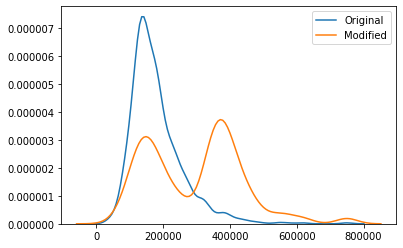

In [42]:
## plot y distribution 
seaborn.kdeplot(housing['SalePrice'], label = "Original")
seaborn.kdeplot(housing_smogn['SalePrice'], label = "Modified")

## Conclusion
In this example, we covered typical usage of SMOGN. We utilized the Ames Housing Dataset to conduct Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise with a number of useful arguments. 

SMOGN over-sampled "minority" values and under-sampled "majority" values in a continuous response variable. The results were briefly examined with the box plot's five number summary and plotted for visual confirmation.

More examples, where additional features of SMOGN are explored can be found within the packages example directory. Developer updates are available in the package's Github repository at https://github.com/nickkunz/smogn. Official releases are available in the Python Package Index and can be found at https://pypi.org/project/smogn.




## References

Branco, P., Torgo, L., Ribeiro, R. (2017). SMOGN: A Pre-Processing Approach for Imbalanced Regression. Proceedings of Machine Learning Research, 74:36-50. http://proceedings.mlr.press/v74/branco17a/branco17a.pdf.

De Cock, D. (2011). Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project. Journal of Statistics Education 19(3). https://doi.org/10.1080/10691898.2011.11889627.

Kunz, N. (2019). SMOGN: Synthetic Minority Over-Sampling for Regression with Gaussian Noise (Version 0.1.0). Python Package Index.
https://pypi.org/project/smogn. 